# Introducción a Keras: Implementando una RNA para clasificación

## Pasos en la implementación de una Red Neuronal Artificial en Keras

1. Define tu conjunto de datos de entrenamiento: vectores de entrada y de salida
2. Define la arquitectura de la Red Neuronal Artificial
3. Configura el proceso de aprendizaje mediante la seleccion de una funcion de error, una funcion de optimizacion y diferentes metricas para monitorizar el proceso
4. Entrena la RNA con tu conjunto de datos de entrenamiento mediante el uso del metodo **_fit()_**

## 0. Imports

Lo primero que debe hacerse es importar las librerías específicas necesarias para la implementación de la Red Neuronal Artificial. En las nuevas versiones de Tensorflow y Keras, la recomendación es utilizar keras a través del framework Tensorflow

In [7]:
import tensorflow as tf

tf.__version__

'2.18.0'

In [8]:
from tensorflow import keras

keras.__version__

'3.6.0'

## 1. Definicion del conjunto de datos de entrenamiento

### 1.1. Importando el conjunto de datos

Keras nos proporciona algunos conjuntos de datos de prueba que podemos utilizar para la realización de pruebas.

In [12]:
from tensorflow.keras import datasets

Podemos utilizar tab sobre "datasets" para visualizar los conjuntos de datos disponibles. En este caso vamos a importar el conjunto de datos MNIST.

In [14]:
mnist = datasets.mnist

Podemos utilizar shift + tab sobre "load_data()" para visualizar el input y output del método.

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

El conjunto de datos importado esta formado por un total de 70000 imágenes divididas en dos conjuntos de datos, el conjunto de datos de entrenamiento X_train (60000 imágenes) y el conjunto de datos de pruebas (10000 imágenes).

In [18]:
X_train.shape

(60000, 28, 28)

In [19]:
X_test.shape

(10000, 28, 28)

Las etiquetas se corresponden con el valor numérico que representa la imágen.

In [21]:
y_train.shape

(60000,)

In [22]:
y_train[0]

5

### 1.2. Visualizando el conjunto de datos

In [24]:
import numpy as np
import matplotlib.pyplot as plt

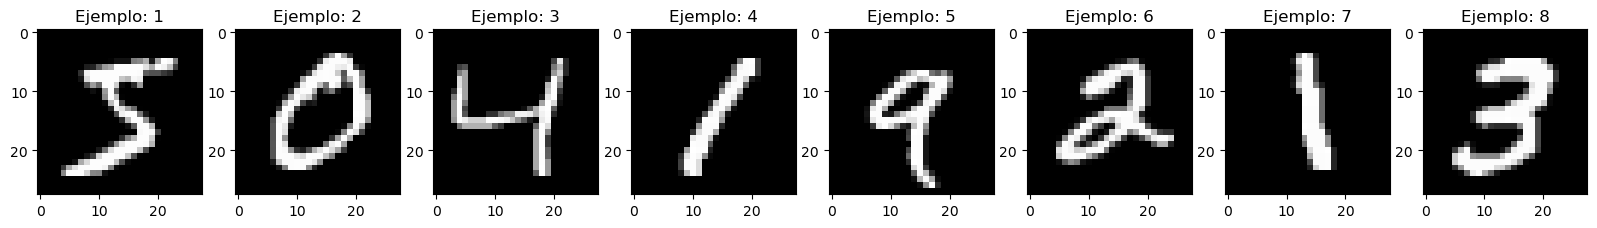

In [25]:
# Visualizacion de los primeros 8 ejemplos de nuestro conjunto de datos de entrenamiento
plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

### 1.3. División del conjunto de datos

Para la realización de una serie de pruebas adicionales vamos a dividir el conjunto de datos de prueba en dos subconjuntos, el conjunto de validación (X_val) y el conjunto de pruebas (X_test)

In [28]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [29]:
X_test.shape

(5000, 28, 28)

In [30]:
X_val.shape

(5000, 28, 28)

## 2. Definicion de la arquitectura de la Red Neuronal Artificial

Tal y como podéis observar en la definición de la Red Neuronal Artificial que se muestra a continuación, el bloque básico que utiliza Keras es la **layer** o capa. La red Neuronal estará formada por diferentes capas que a su vez contendrán un conjunto de neuronas que se corresponden con el primer parámetro que se le proporciona.

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers

Definimos una Red Neuronal Artificial formada por 3 capas:
* La primera capa estará formada por 300 neuronas
* La segunda capa estará formada por 100 neuronas
* La última capa estará formada por 10 neuronas

In [35]:
network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,))) #Añade la primera cama "densa" densamente conectada, como la hemos visto
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

C:\Users\santo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Una vez hemos definido la arquitectura de la Red Neuronal Artificial podemos visualizarla junto con el número total de parámetros utilizando el método *summary()*

In [52]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### 2.2. Acceso a los elementos definidos de la RNA

In [54]:
network.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

En este caso vamos a acceder a los parámetros del modelo que componen las neuronas de la primera hidden layer

In [56]:
hidden1 = network.layers[1]

In [58]:
weights, biases = hidden1.get_weights()

Como puede observarse en las siguientes celdas, Keras automáticamente inicializa el valor de los parámetros de manera aleatoria y los bias term con el valor 0

In [60]:
weights

array([[ 0.01558558, -0.05109347, -0.05030641, ..., -0.04273308,
        -0.05092929,  0.03663888],
       [ 0.11358286, -0.0249136 ,  0.11973458, ...,  0.02162739,
        -0.08964573, -0.10429692],
       [-0.02981699, -0.05290172, -0.08893926, ...,  0.01373162,
         0.06392115,  0.07260216],
       ...,
       [-0.06037312, -0.047648  ,  0.09950944, ..., -0.04983564,
        -0.00730495, -0.09303167],
       [ 0.04039659,  0.03798381,  0.10036086, ...,  0.07066806,
         0.01366315,  0.08988082],
       [-0.1075067 , -0.08686484,  0.09417071, ...,  0.05043928,
        -0.02990961, -0.054536  ]], dtype=float32)

In [62]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## 3. Configuracion de la Red Neuronal Artificial

Para que la Red Neuronal Artificial funcione adecuadamente va a requerir tres componentes adicionales que se seleccionan durante el proceso de compilación:
1. **La función de error**: Se utiliza en el proceso de optimización de los parámetros del modelo para medir el error  producido al modificar el valor de los parámetros del modelo en una dirección determinada
2. **La función de optimización**: Se corresponde con la función encargada de actualizar el valor de los parámetros del modelo en una dirección determinada en función del resultado de la función de error
3. **Metricas para monitorizar el proceso de entrenamiento**: Es interesante utilizar un conjunto de métricas durante el proceso de entrenamiento de la Red Neuronal Artificial de manera que podamos saber en cada iteración si el valor de los parámetros del modelo es adecuado o se están produciendo problemas como *overfitting*

In [64]:
network.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy', 'Precision'])

## 4. Preparacion del conjunto de datos

Debido a la forma en la que hemos definido la arquitectura de nuestra Red Neuronal Artificial y los parámetros de compilación, vamos a requerir realizar algunas transformaciones sobre nuestro conjunto de datos

### 4.1. Preparación de las características de entrada

In [78]:
X_train_prep = X_train.reshape((60000, 28*28))
X_train_prep = X_train_prep.astype('float32') / 255 #Normalizacion o estandarizacion

X_test_prep = X_test.reshape((5000, 28*28))
X_test_prep = X_test_prep.astype('float32') / 255 #Normalizaciono estandarizacion

X_val_prep = X_val.reshape((5000, 28*28))
X_val_prep = X_val_prep.astype('float32') / 255 #Normalizacion o estandarizacion

In [70]:
X_train.shape

(60000, 28, 28)

In [72]:
X_train_prep.shape

(60000, 784)

### 4.2. Preparación de las características de salida (etiquetas)

In [80]:
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)
y_val_prep = to_categorical(y_val)

In [84]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [82]:
y_train_prep

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## 5. Entrenamiento de la Red Neuronal Artificial

En este punto ya estamos listos para entrenar nuestra Red Neuronal Artificial invocando el método *fit()*. Una de las capacidades que nos proporciona Keras es la de integrar el proceso de validación en el propio proceso de entrenamiento, para ello, junto con el subconjunto de datos de entrenamiento, debemos proporcionarle a este método el subconjunto de validación.

In [110]:
history = network.fit(X_train_prep, 
                      y_train_prep, 
                      epochs=10, 
                      validation_data=(X_val_prep, y_val_prep))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Precision: 0.9801 - accuracy: 0.9742 - loss: 0.0922 - val_Precision: 0.9737 - val_accuracy: 0.9672 - val_loss: 0.1087
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Precision: 0.9824 - accuracy: 0.9776 - loss: 0.0832 - val_Precision: 0.9739 - val_accuracy: 0.9698 - val_loss: 0.1034
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Precision: 0.9821 - accuracy: 0.9774 - loss: 0.0790 - val_Precision: 0.9743 - val_accuracy: 0.9696 - val_loss: 0.0988
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Precision: 0.9837 - accuracy: 0.9798 - loss: 0.0723 - val_Precision: 0.9746 - val_accuracy: 0.9704 - val_loss: 0.0985
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Precision: 0.9855 - accuracy: 0.9813 - loss: 0.0658 - val_Precision: 0.9756 - val_accuracy: 0.9712 - val_loss: 0.0927
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Precision: 0.9864 - accuracy: 0.9831 - loss: 0.0617 - val_Precision: 0.975

En la variable ***history*** se almacenan varios valores importantes:
* El valor de los parámetros del modelo después del entrenamiento
* La lista de *epochs* llevados a cabo
* Un diccionario con el error producido en cada *epoch* en el conjunto de datos de entreanamiento y validación

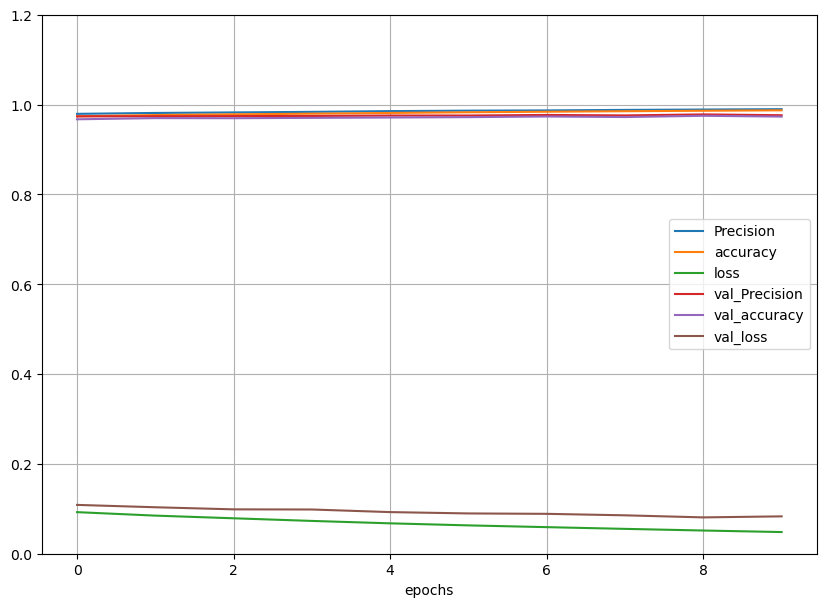

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()
#Sirve para ver si con mas iteraciones podemos continuar mejorando

Debido a que en la gráfica anterior se observa que el error en el conjunto de datos y de validación sigue disminuyendo, podemos continuar entrenando el algoritmo invocando de nuevo el método *fit()*. Keras continuará el entrenamiento en el punto en el que lo dejó.

## 6. Validación con el conjunto de datos de pruebas

In [114]:
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test_prep)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - Precision: 0.9801 - accuracy: 0.9761 - loss: 0.0706


In [90]:
print('test_acc:', test_acc)
print('test_prec:', test_prec)

test_acc: 0.9664000272750854
test_prec: 0.9724919199943542


## 7. Predicción de nuevos ejemplos

In [116]:
# Suponemos que X_new es un nuevo ejemplo que el algoritmo no ha visto nunca
X_new = X_test[34]

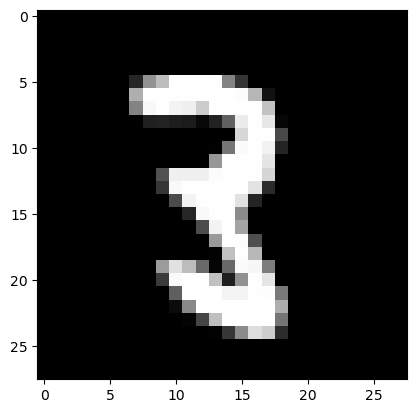

In [94]:
# Representación gráfica del nuevo ejemplo que queremos predecir
plt.imshow(np.reshape(X_new, (28,28)), cmap=plt.cm.gray)
plt.show()

In [118]:
# Preprocesamos la nueva imagen que queremos predecir
X_new_prep = X_new.reshape((1, 28*28))
X_new_prep = X_new_prep.astype('float32') / 255

In [120]:
# Relizamos la prediccion
y_proba = network.predict(X_new_prep)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [122]:
y_proba

array([[1.1987041e-06, 5.3336793e-05, 3.4542372e-03, 9.8896837e-01,
        3.4055631e-08, 6.1509381e-06, 5.1773545e-09, 3.8216967e-06,
        7.5024911e-03, 1.0446697e-05]], dtype=float32)

In [124]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ]],
      dtype=float32)

In [104]:
# Realizamos la prediccion obteniendo una clase en lugar de una probabilidad
np.argmax(network.predict(X_new_prep), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([3], dtype=int64)

Es importante saber que el método tradicional *predict_classes* va a ser deprecado proximamente

## 8. Guardar el modelo en disco

Con Keras generamos la arquitectura de la red neuronal, la entrenamos y después la evaluamos. Existen diferentes alternativas a la hora de exportar el modelo entrenado (https://keras.io/getting_started/faq/#what-are-my-options-for-saving-models), en este caso se expone una de las más utilizadas.

De la forma que se indica a continuación, vamos a exportar en un fichero los siguientes componentes de la red neuronal: 
* La arquitectura del modelo
* Los parámetros del modelo
* Los hiperparámetros del modelo
* Las métricas

In [126]:
# Guardamos el modelo en disco
network.save("modelo_mnist.h5")

Una vez ejecutada la celda anterior, generará un fichero *modelo_mnist* que puede utilizarse para transportarlo a otro sistema y predecir con nuevos ejemplos. La forma en la que puedes importar este fichero para predecir con nuevos ejemplos es la siguiente:

In [128]:
# Importamos las librerias necesarias
from tensorflow.keras.models import load_model
 
# Cargamos el modelo de disco
mnist_model = load_model("modelo_mnist.h5")
 
# Realizamos una nueva prediccion
y_pred = np.argmax(mnist_model.predict(X_new_prep), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [130]:
y_pred

array([3], dtype=int64)